In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
dfa= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
dfa

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
dfa.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [4]:
dfa.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [5]:
dfa.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df = dfa.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [7]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [8]:
df.columns.to_list()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [9]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-      C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+      D     B-      C      D      A     D+   
2  CS-97003      A      B      A     B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+      D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-     B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [12]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-      C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+      D     B-      C      D      A     D+   
2  CS-97003      A      B      A     B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+      D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-     B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [13]:
 df.replace({'WU':0, 'I':0,'W':0}, inplace=True)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df.isna().any()

Seat No.    False
PH-121      False
HS-101      False
CY-105      False
HS-105      False
MT-111      False
CS-105      False
CS-106      False
EL-102      False
EE-119      False
ME-107      False
CS-107      False
HS-205      False
MT-222      False
EE-222      False
MT-224      False
CS-210      False
CS-211      False
CS-203      False
CS-214      False
EE-217      False
CS-212      False
CS-215      False
MT-331      False
EF-303      False
HS-304      False
CS-301      False
CS-302      False
TC-383      False
MT-442      False
EL-332      False
CS-318      False
CS-306      False
CS-312      False
CS-317      False
CS-403      False
CS-421      False
CS-406      False
CS-414      False
CS-419      False
CS-423      False
CS-412      False
CGPA        False
dtype: bool

In [16]:
df.fillna(df.mean(), inplace=True)

Data PreProcessing

In [17]:
# For convenience and modeling , converting categorical values into numerical order
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [18]:
df.corr()

PH-121    HS-101    CY-105    HS-105    MT-111    CS-105    CS-106  \
PH-121  1.000000  0.403916  0.634998  0.542404  0.491448  0.670488  0.294662   
HS-101  0.403916  1.000000  0.347955  0.484764  0.449556  0.432621  0.361570   
CY-105  0.634998  0.347955  1.000000  0.592358  0.572744  0.615777  0.404415   
HS-105  0.542404  0.484764  0.592358  1.000000  0.532648  0.527830  0.522210   
MT-111  0.491448  0.449556  0.572744  0.532648  1.000000  0.426058  0.543480   
CS-105  0.670488  0.432621  0.615777  0.527830  0.426058  1.000000  0.283559   
CS-106  0.294662  0.361570  0.404415  0.522210  0.543480  0.283559  1.000000   
EL-102  0.430898  0.364790  0.482410  0.377415  0.573076  0.357784  0.356170   
EE-119  0.653517  0.309038  0.536023  0.457887  0.441939  0.586035  0.263301   
ME-107  0.560114  0.352839  0.462786  0.378209  0.483733  0.480496  0.298441   
CS-107  0.499667  0.498074  0.517756  0.558946  0.513437  0.526146  0.463096   
HS-205  0.324185  0.196440  0.312334  0.220426  0.349484  0.201161  0.159766   
MT-222  0.557052  0.406956  0.495965  0.489549  0.518584  0.498284  0.362846   
EE-222  0.534164  0.390335  0.426028  0.382925  0.384961  0.495339  0.133766   
MT-224  0.341750  0.261953  0.403595  0.409489  0.582330  0.249876  0.423606   
CS-210  0.515716  0.348801  0.488769  0.505504  0.622336  0.440156  0.447395   
CS-211  0.346551  0.336725  0.464051  0.402048  0.555424  0.370102  0.381223   
CS-203  0.475221  0.265322  0.411969  0.343368  0.525523  0.427970  0.314782   
CS-214  0.453154  0.482282  0.520208  0.459006  0.593484  0.466477  0.478654   
EE-217  0.446716  0.367007  0.425490  0.406604  0.552394  0.370150  0.365228   
CS-212  0.376684  0.366726  0.445239  0.518247  0.593146  0.348381  0.576210   
CS-215  0.521785  0.429279  0.537874  0.511049  0.572041  0.481916  0.399908   
MT-331  0.185837  0.151900  0.335513  0.285222  0.402257  0.230586  0.310339   
EF-303  0.220248  0.252791  0.336490  0.439922  0.445091  0.210016  0.485195   
HS-304  0.470265  0.441300  0.357885  0.363968  0.312121  0.494834  0.157731   
CS-301  0.307072  0.310643  0.355399  0.462233  0.557088  0.244551  0.503146   
CS-302  0.455429  0.373809  0.440813  0.468255  0.505171  0.450468  0.351280   
TC-383  0.180969  0.344223  0.275892  0.430116  0.521323  0.208635  0.523267   
MT-442  0.468230  0.254436  0.425631  0.352381  0.396188  0.446805  0.250885   
EL-332  0.393606  0.403545  0.347622  0.385570  0.561177  0.353850  0.369162   
CS-318  0.430933  0.448478  0.326900  0.378035  0.351979  0.440036  0.225152   
CS-306  0.464483  0.449924  0.378920  0.517415  0.476683  0.421639  0.344122   
CS-312  0.017554  0.221540  0.223884  0.284224  0.466358  0.046015  0.480554   
CS-317  0.488370  0.409697  0.474775  0.503937  0.570492  0.397065  0.418149   
CS-403  0.322690  0.243646  0.465345  0.494668  0.411811  0.268677  0.458734   
CS-421  0.332941  0.340108  0.352003  0.430843  0.525131  0.269026  0.408368   
CS-406  0.273677  0.309811  0.138621  0.194099  0.276972  0.239135  0.144621   
CS-414  0.181826  0.271739  0.056944  0.127730  0.234948  0.152510  0.100997   
CS-419  0.434388  0.283499  0.421307  0.467260  0.499176  0.317141  0.440097   
CS-423  0.081660  0.240377  0.101452  0.236596  0.380456  0.044027  0.359455   
CS-412  0.231122  0.249635  0.032283  0.136358  0.257067  0.156766  0.146583   
CGPA    0.678066  0.562432  0.671831  0.659114  0.743227  0.627746  0.571756   

          EL-102    EE-119    ME-107  ...    CS-312    CS-317    CS-403  \
PH-121  0.430898  0.653517  0.560114  ...  0.017554  0.488370  0.322690   
HS-101  0.364790  0.309038  0.352839  ...  0.221540  0.409697  0.243646   
CY-105  0.482410  0.536023  0.462786  ...  0.223884  0.474775  0.465345   
HS-105  0.377415  0.457887  0.378209  ...  0.284224  0.503937  0.494668   
MT-111  0.573076  0.441939  0.483733  ...  0.466358  0.570492  0.411811   
CS-105  0.357784  0.586035  0.480496  ...  0.046015  0.397065  0.268677   
CS-106  0.356170  0.263301  0.298441  ...  0

<AxesSubplot:>

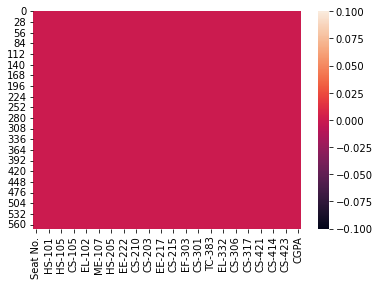

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.dtypes

Seat No.     object
PH-121      float64
HS-101      float64
CY-105      float64
HS-105      float64
MT-111      float64
CS-105      float64
CS-106      float64
EL-102      float64
EE-119      float64
ME-107      float64
CS-107      float64
HS-205      float64
MT-222      float64
EE-222      float64
MT-224      float64
CS-210      float64
CS-211      float64
CS-203      float64
CS-214      float64
EE-217      float64
CS-212      float64
CS-215      float64
MT-331      float64
EF-303      float64
HS-304      float64
CS-301      float64
CS-302      float64
TC-383      float64
MT-442      float64
EL-332      float64
CS-318      float64
CS-306      float64
CS-312      float64
CS-317      float64
CS-403      float64
CS-421      float64
CS-406      float64
CS-414      float64
CS-419      float64
CS-423      float64
CS-412      float64
CGPA        float64
dtype: object

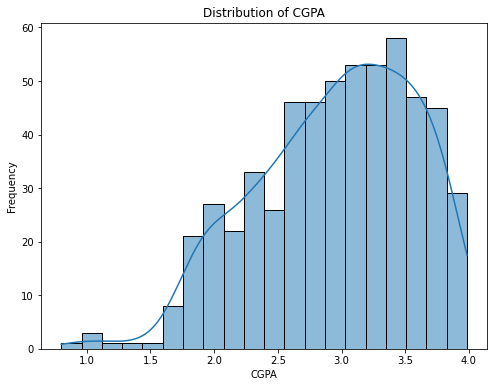

In [21]:
#Data Visulization
plt.figure(figsize=(8, 6))
sns.histplot(df["CGPA"], bins=20, kde=True)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:>

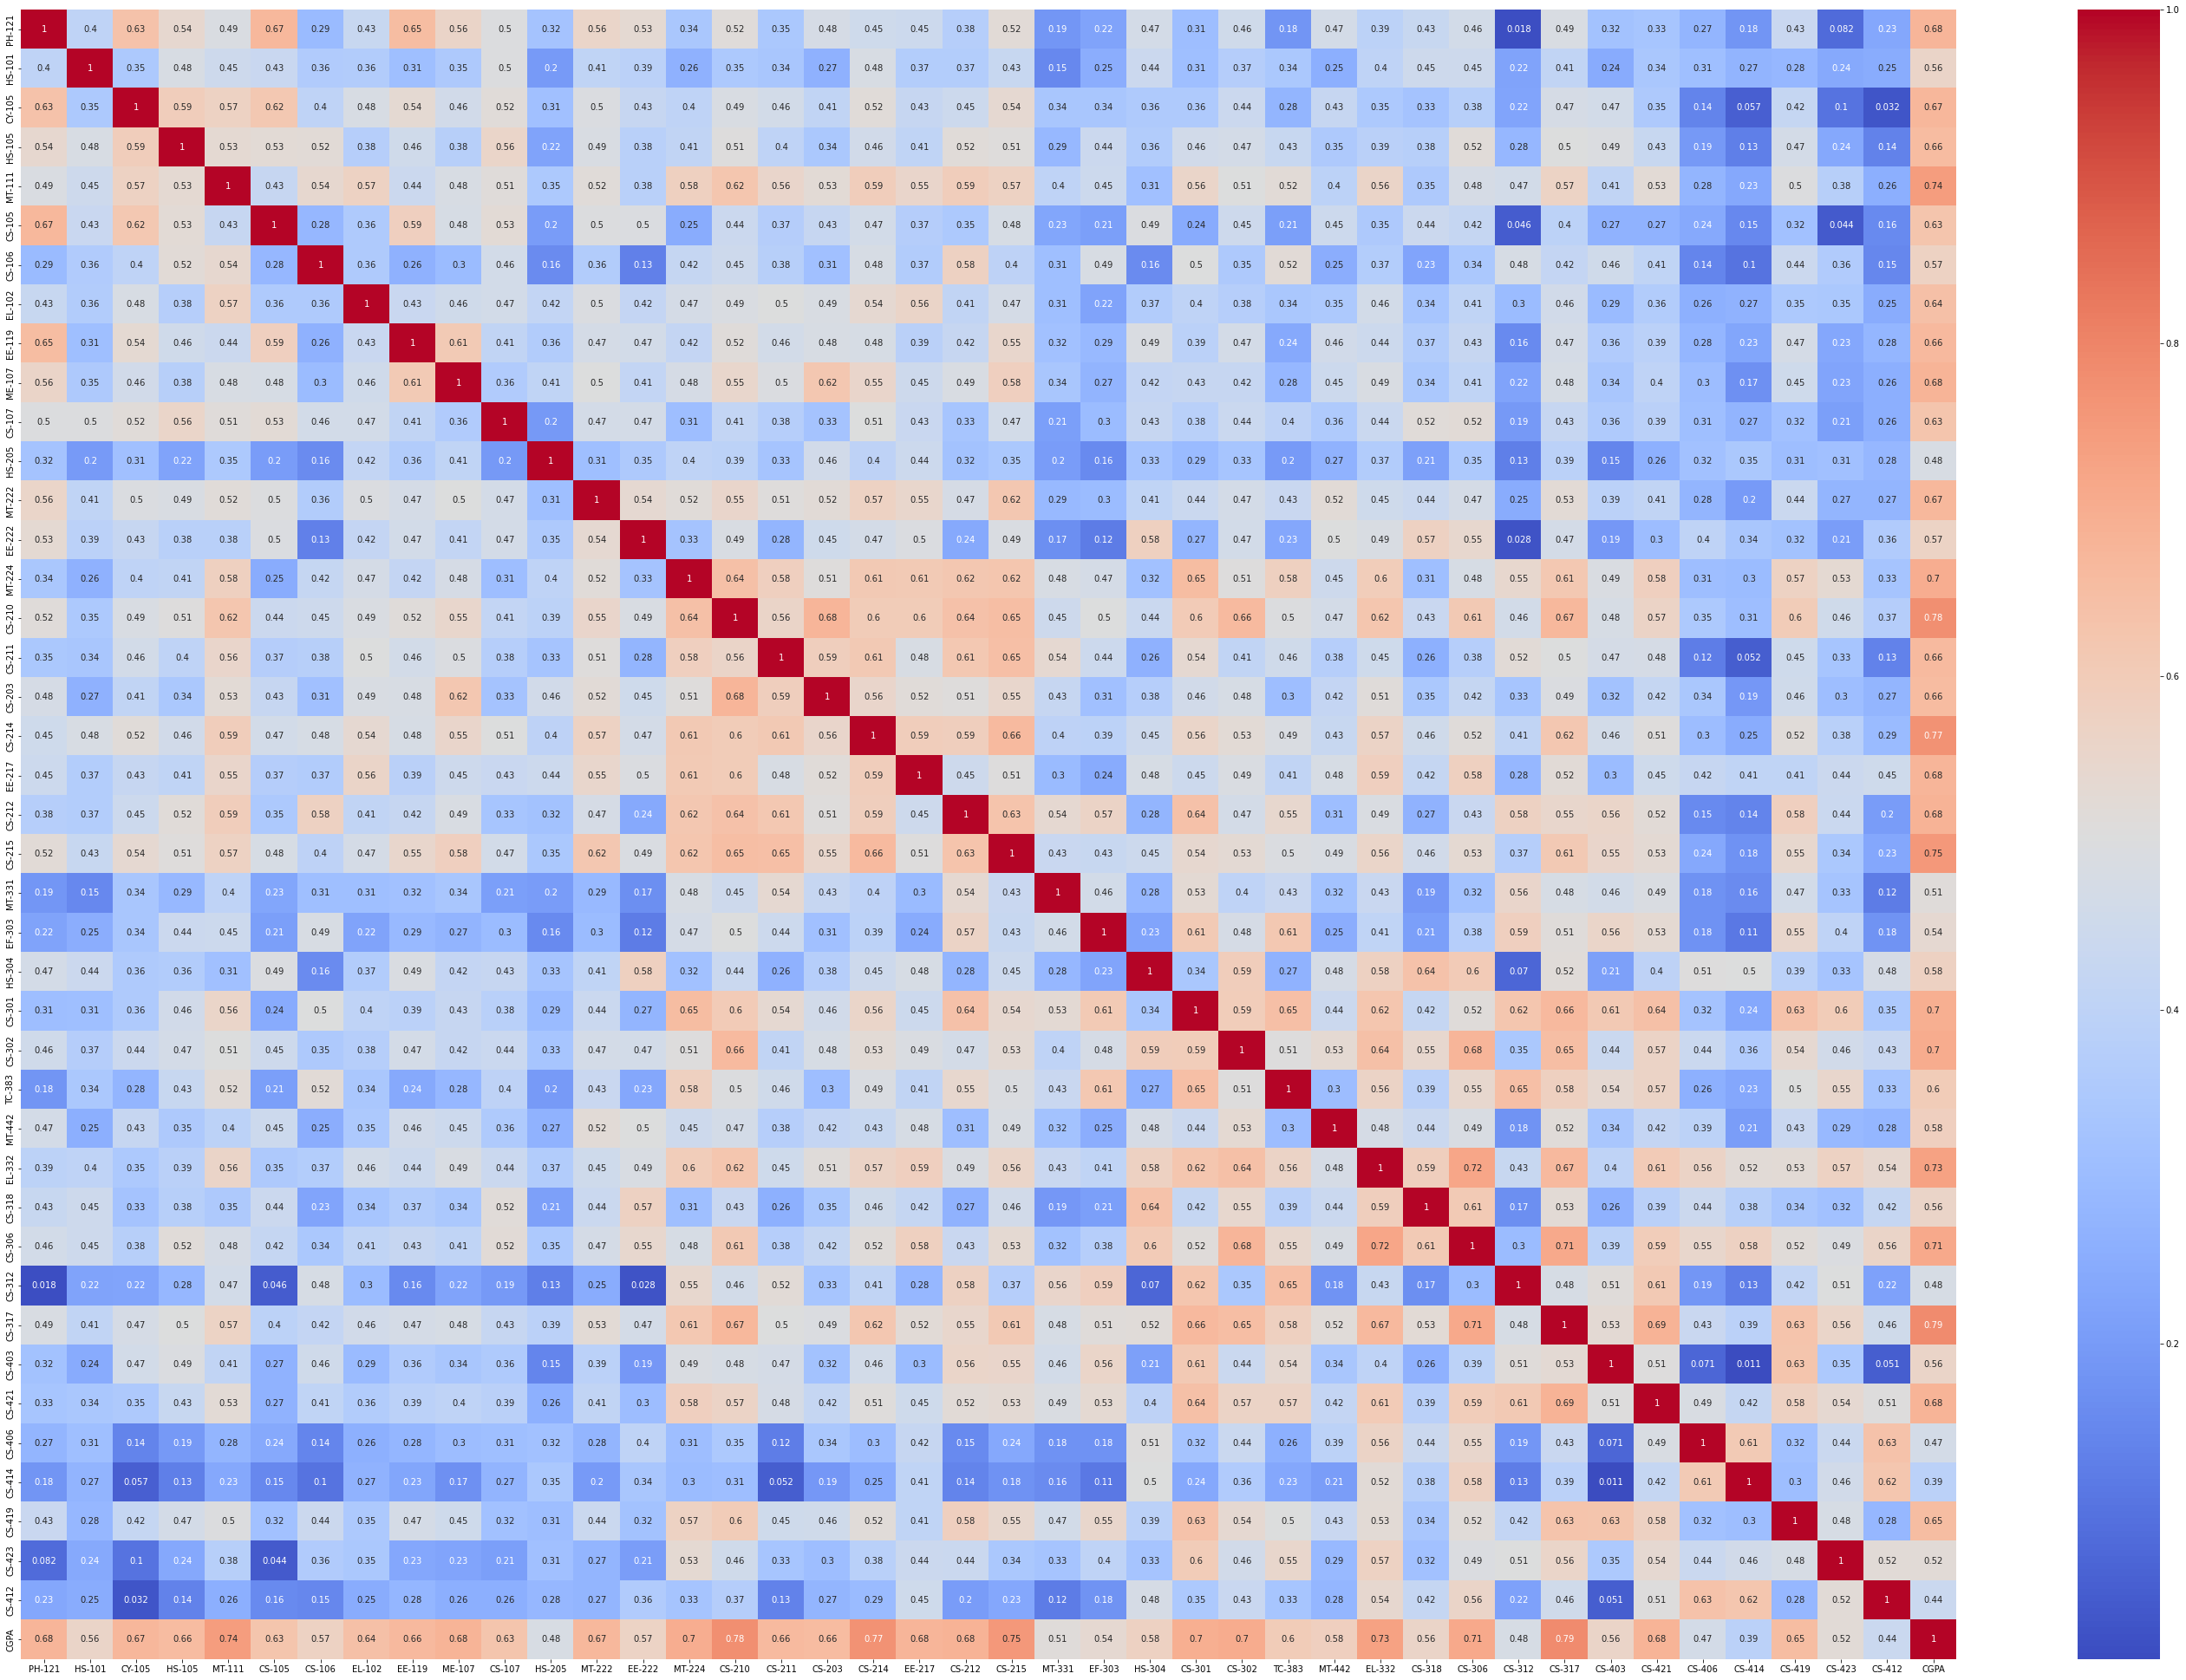

In [22]:
plt.figure(figsize=[50,35])
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

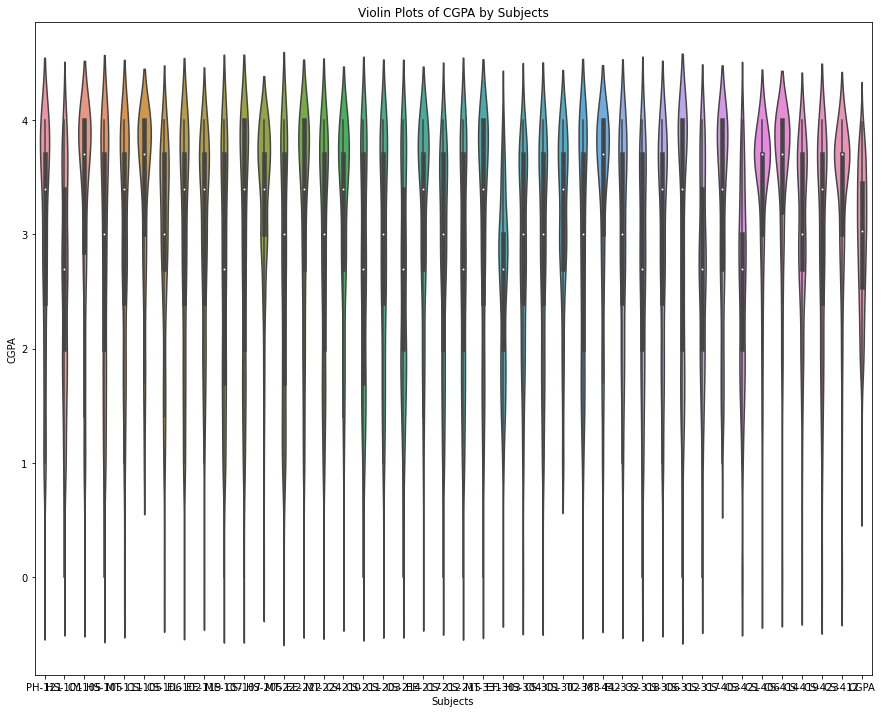

In [23]:
plt.figure(figsize=(15,12))
sns.violinplot(data=df)
plt.title("Violin Plots of CGPA by Subjects")
plt.xlabel("Subjects")
plt.ylabel("CGPA")
plt.show()

In [24]:
plt.figure(figsize=[50,35])
sns.pairplot(df)

<Figure size 3600x2520 with 0 Axes>

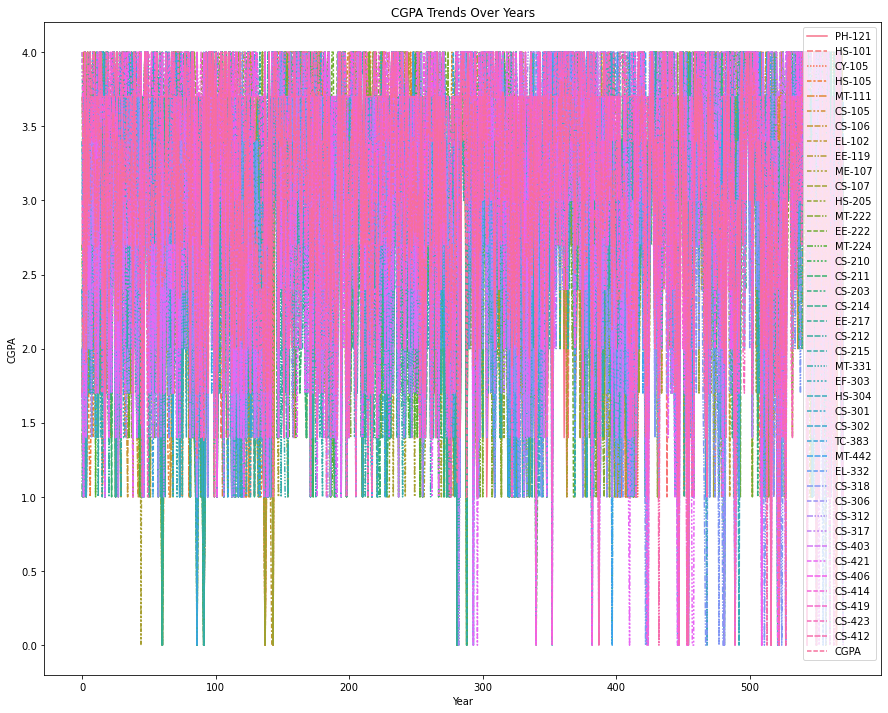

In [25]:
plt.figure(figsize=(15, 12))
sns.lineplot(data=df,)
plt.title("CGPA Trends Over Years")
plt.xlabel("Year")
plt.ylabel("CGPA")
plt.show()

In [26]:
df['CGPA'].value_counts()

3.019    5
3.443    3
2.756    3
2.793    3
2.206    3
        ..
2.749    1
3.252    1
3.664    1
3.111    1
3.168    1
Name: CGPA, Length: 491, dtype: int64

In [27]:
df['CGPA'].max()

3.985

In [28]:
df['CGPA'].min()

0.8

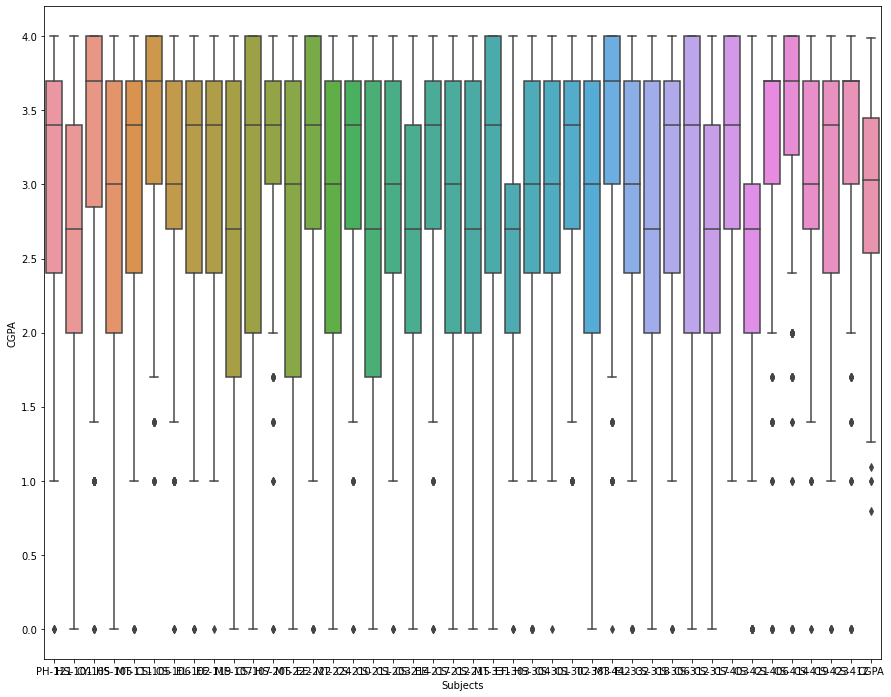

In [29]:
# Clearly can be seen that dataset has outliers
plt.figure(figsize=[15,12])
sns.boxplot(data=df)
plt.xlabel('Subjects')
plt.ylabel('CGPA')
plt.show()

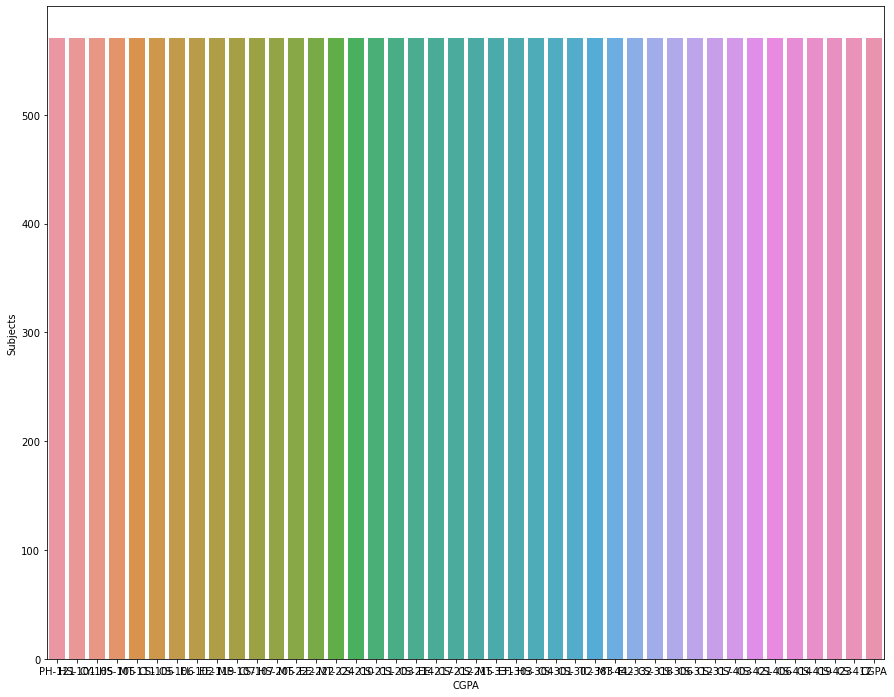

In [30]:
plt.figure(figsize=[15,12])
sns.countplot(data=df)
plt.xlabel('CGPA')
plt.ylabel('Subjects')
plt.show()

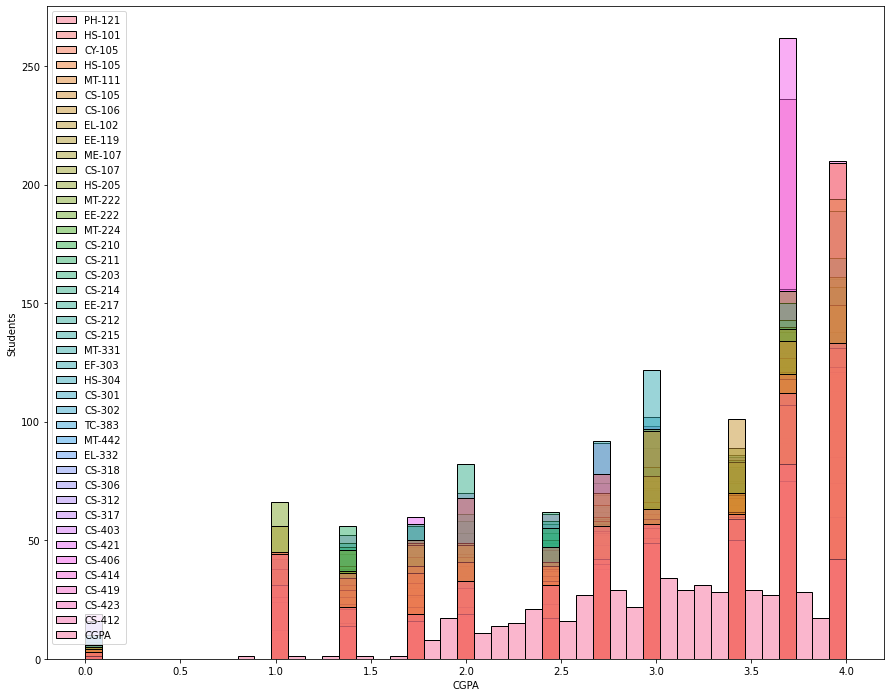

In [31]:
plt.figure(figsize=[15,12])
sns.histplot(data=df) 
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.show()

In [32]:
df.describe()

PH-121      HS-101      CY-105      HS-105      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.018389    2.628371    3.269702    2.885989    3.001051    3.329247   
std      0.971594    0.908402    0.923424    1.013114    0.938643    0.799826   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.400000    2.000000    2.850000    2.000000    2.400000    3.000000   
50%      3.400000    2.700000    3.700000    3.000000    3.400000    3.700000   
75%      3.700000    3.400000    4.000000    3.700000    3.700000    4.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     2.974956    2.982837    3.033100    2.711559  ...    2.962347   
std      0.852357    0.966665    0.821065    1.018482  ...    1.034341   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.700000    2.400000    2.400000    1.700000  ...    2.000000   
50%      3.000000    3.400000    3.400000    2.700000  ...    3.400000   
75%      3.700000    3.700000    3.700000    3.700000  ...    4.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     2.707881    3.152890    2.514011    3.322942    3.440806    3.047811   
std      0.869497    0.852533    0.908003    0.788436    0.767565    0.739991   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.700000    2.000000    3.000000    3.200000    2.700000   
50%      2.700000    3.400000    2.700000    3.700000    3.700000    3.000000   
75%      3.400000    4.000000    3.000000    3.700000    4.000000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     2.997023    3.306130    2.954888  
std      0.880316    0.749513    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.400000    3.000000    2.538000  
50%      3.400000    3.700000    3.029000  
75%      3.700000    3.700000    3.451000  
max      4.000000    4.000000    3.985000  

[8 rows x 42 columns]

<AxesSubplot:>

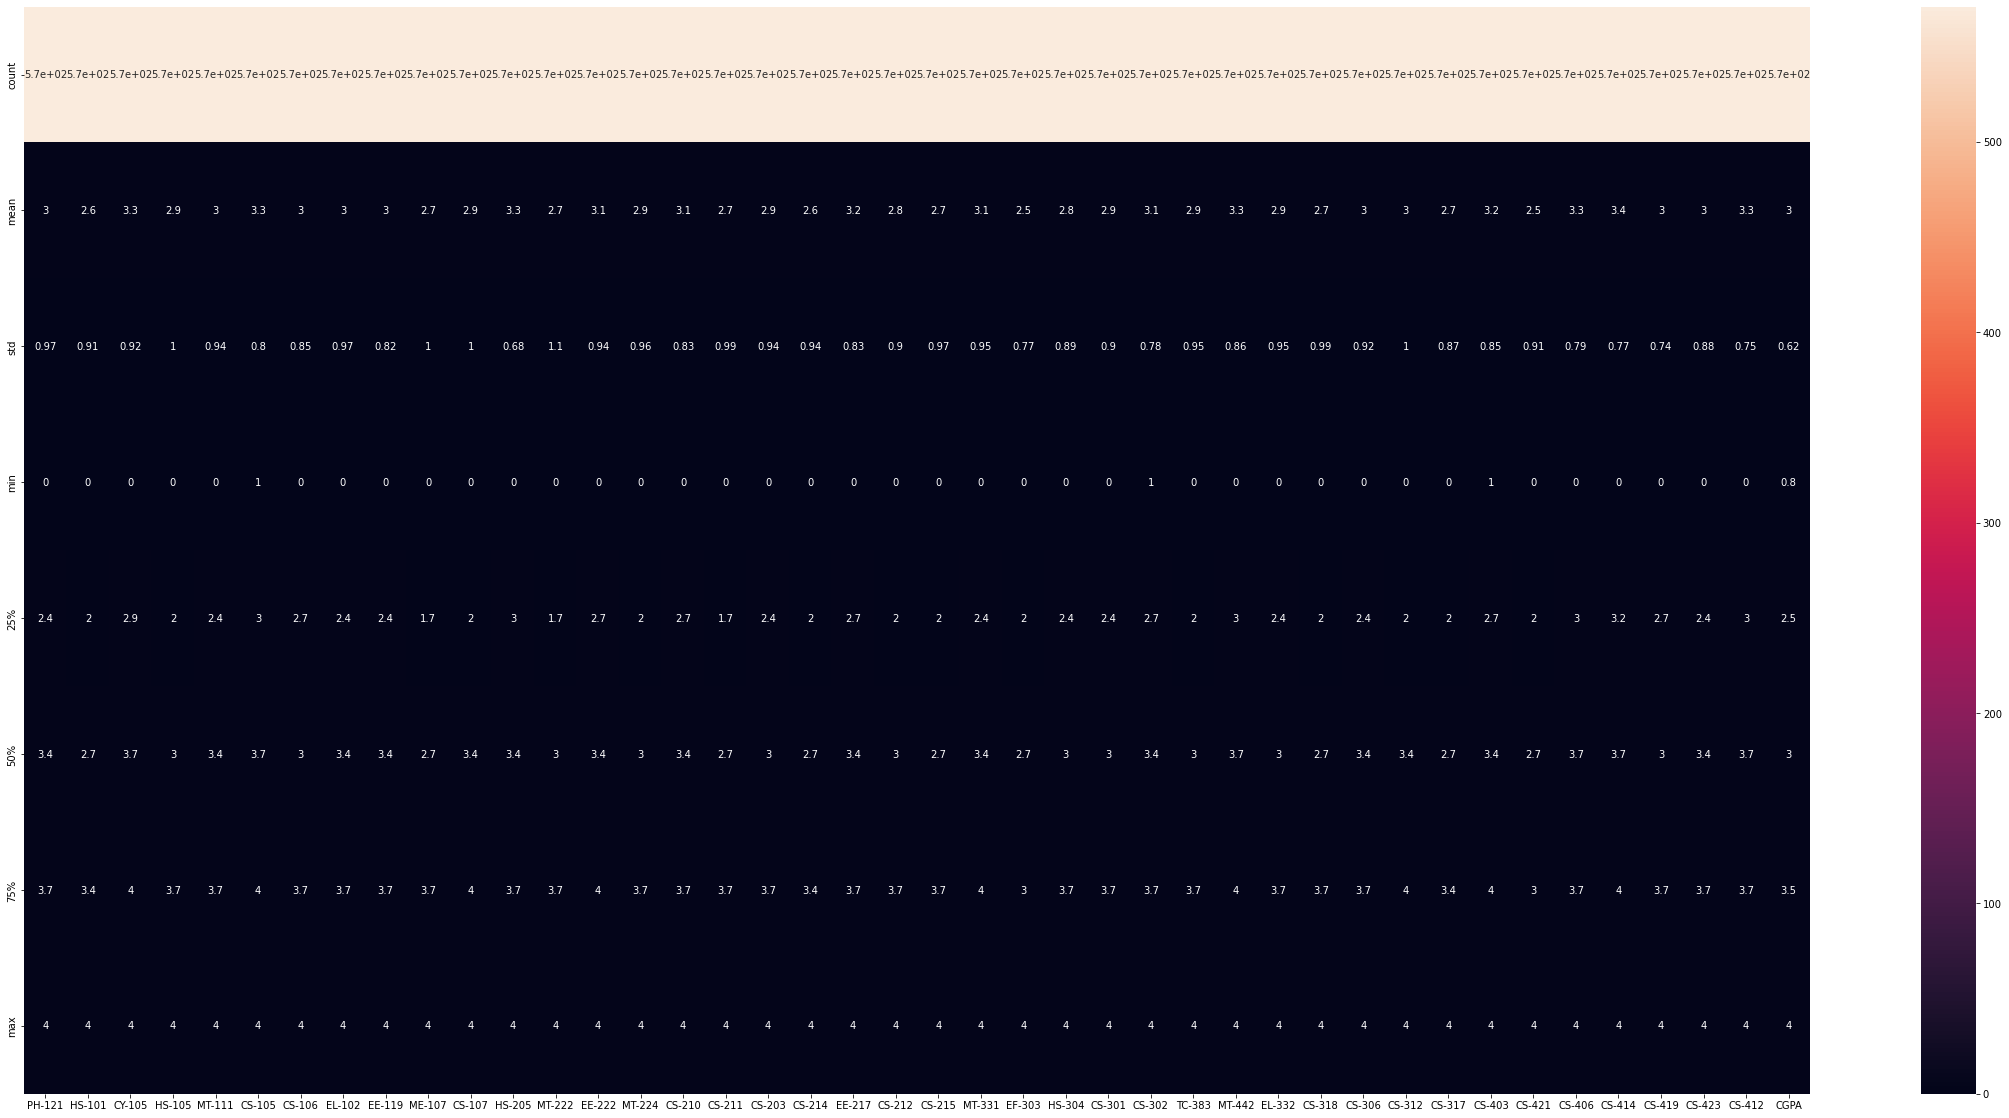

In [33]:
plt.figure(figsize=[40,20])
sns.heatmap(df.describe(),annot=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seat No.  571 non-null    object 
 1   PH-121    571 non-null    float64
 2   HS-101    571 non-null    float64
 3   CY-105    571 non-null    float64
 4   HS-105    571 non-null    float64
 5   MT-111    571 non-null    float64
 6   CS-105    571 non-null    float64
 7   CS-106    571 non-null    float64
 8   EL-102    571 non-null    float64
 9   EE-119    571 non-null    float64
 10  ME-107    571 non-null    float64
 11  CS-107    571 non-null    float64
 12  HS-205    571 non-null    float64
 13  MT-222    571 non-null    float64
 14  EE-222    571 non-null    float64
 15  MT-224    571 non-null    float64
 16  CS-210    571 non-null    float64
 17  CS-211    571 non-null    float64
 18  CS-203    571 non-null    float64
 19  CS-214    571 non-null    float64
 20  EE-217    571 non-null    float6

Training Model

In [35]:
x = df.drop(columns=["Seat No.", "CGPA"])
y = df["CGPA"]

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [37]:
a=LinearRegression()

In [38]:
b=RandomForestRegressor()

In [39]:
a.fit(x_train, y_train)

LinearRegression()

In [40]:
b.fit(x_train, y_train)

RandomForestRegressor()

In [41]:
from sklearn import metrics
training_data_prediction=a.predict(x_train)
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.9379829922870476


In [42]:
training_data_prediction=b.predict(x_train)
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.9891067136808576


In [43]:
y_pred = a.predict(x_test)

In [44]:
y_pred = b.predict(x_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.014464090676521732
Root Mean Squared Error: 0.1202667480084239


In [46]:
new_student_grades = [2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,3.4,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.0,1.7,2.4,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7] # Grades for each course
new_student_grades = pd.DataFrame([new_student_grades], columns=x.columns)
predicted_cgpa = a.predict(new_student_grades)
print("Predicted CGPA for the new student:", predicted_cgpa)

Predicted CGPA for the new student: [2.07599452]
